In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import re
import psycopg2
import osmnx as ox
import folium
import ipywidgets
import  matplotlib.pyplot as plt
from shapely.geometry import Point,Polygon,LineString
from shapely.ops import nearest_points
from tqdm.autonotebook import tqdm
import seaborn as sns

/home/eamgo/miniconda3/envs/gsaproject/lib/python3.7/site-packages/ipykernel_launcher.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  if sys.path[0] == '':


In [2]:
firestationsFile = 'data/bfp_firestations31july2017.csv'
firetrucksFile = 'data/bfp_firetrucks31july2017_5.csv'

In [3]:
fireStationsData = pd.read_csv(firestationsFile, engine='python')
# gpd.GeoDataFrame(fireStationsData,geometry='station_coordinates')
# def convertCoords(x):
fireStationsData.head()   

,station_id,region,province_or_fire_district,city_or_municipality,station_name,station_street,station_barangay,station_coordinates,station_phone,station_cell,...,station_lot_owner,station_building_status,station_lot_status,station_floor_area,station_lot_size,station_building_storey,activation_date,remarks,Unnamed: 21,Unnamed: 22
0,10000000,1,LA UNION,SANTO TOMAS,ORD - REGION 1,-,BARANGAY PATAC,"16� 15' 49"" N, 120� 23' 38"" E",(072) 687-0763,09164191249 / 09268765365,...,BFP,SEPARATE BUILDING,DONATED,-,"1,000.00",-,01/11/2013,W/DOD/BFP OWNED BLDG./ NO LAND TITLE YET,NaN,NaN
1,12800000,1,ILOCOS NORTE,LAOAG CITY (CAPITAL),OPFM - ILOCOS NORTE,RIZAL STREET CORNER NOLASCO STREET,BARANGAY 14,"18�12' 19.7418"" N, 120� 35' 1.244"" E",(077) 670 7681,-,...,BFP,ATTACHED TO OTHER BUILDING,-,360,"1,000.00",2,-,LOCATED AT LAOAG CITY FS,NaN,NaN
2,12802000,1,ILOCOS NORTE,BACARRA,BACARRA FIRE STATION,F. LOPEZ STREET,BARANGAY SANTA RITA,"18�15' 30.5496"" N, 120� 36' 17.0418""",(772) 670-0055,-,...,LGU,SEPARATE BUILDING,DONATED,40,"1,278.00",1,-,WITH LOT DONATED/LGU OWNED BLDG,NaN,NaN
3,12803000,1,ILOCOS NORTE,BADOC,BADOC FIRE STATION,SORIANO STREET,BARANGAY 3 ALOGOOG,"17� 55' 39.1692"" N, 120� 28' 27.8502"" E",-,-,...,LGU,ATTACHED TO OTHER BUILDING,-,153,-,2,-,LGU OWNED BLDG,NaN,NaN
4,12804000,1,ILOCOS NORTE,BANGUI,BANGUI FIRE STATION,C. TORRES STREET,BARANGAY SAN LORENZO,"18� 36' 06"" N, 120� 46' 39"" E",-,9163344523,...,LGU,SEPARATE BUILDING,-,27,-,1,-,LGU OWNED BLDG,NaN,NaN


In [4]:
testcoords = '''16� 15' 49" N, 120� 23' 38" E'''

In [5]:

# # re.findall(r'(\d*)\D', testcoords)
# # print(a, b)
# def convertCoords(x):
#     if x['station_coordinates'] != '-':
#         polstring = x['station_coordinates'].split(',')
#         print(polstring)
# #         coords = []
# #         for x in polstring:
# #     #         print(x)
# #             polcoords = [d for d in re.findall(r'(\d*)\D', x) if d]
# #             degres = float(polcoords[0])
# #             minutes = float(polcoords[1])+(float(polcoords[2])/60)
# #             coords.append(degres+(minutes/60))
# #         return np.max(coords)# np.min(coords))
# #     long = np.max(coords)
# #     lat = np.min(coords)
# fireStationsData['long'] = fireStationsData.apply(convertCoords, axis=1)

In [6]:
fireStationsData[fireStationsData['city_or_municipality'].str.contains('QUEZON CITY')].sort_values(by='station_name')

,station_id,region,province_or_fire_district,city_or_municipality,station_name,station_street,station_barangay,station_coordinates,station_phone,station_cell,...,station_lot_owner,station_building_status,station_lot_status,station_floor_area,station_lot_size,station_building_storey,activation_date,remarks,Unnamed: 21,Unnamed: 22
1256,137404009,NCR,DISTRICT V,QUEZON CITY,AGHAM FIRE SUBSTATION,AGHAM ROAD,BARANGAY BAGONG PAG-ASA,-,(02) 285-4281,-,...,BFP,SEPARATE BUILDING,-,-,"1,696.90",1,01/01/1979,-,NaN,NaN
1255,137404005,NCR,DISTRICT V,QUEZON CITY,BAESA FIRE SUBSTATION,QUIRINO HIGHWAY,BARANGAY BAESA,-,(02) 359-0990,-,...,PRIVATE,SEPARATE BUILDING,-,-,219,-,01/01/1996,PRIVATE PROPERTY,NaN,NaN
1257,137404012,NCR,DISTRICT V,QUEZON CITY,BAHAY TORO FIRE SUBSTATION,ROAD 15,BARANGAY BAHAY TORO,-,(02) 454-4219 / 772-8955,-,...,LGU,SEPARATE BUILDING,-,-,270,1,01/01/2000,-,NaN,NaN
1220,130000001,NCR,DISTRICT V,QUEZON CITY,BFP NATIONAL HEADQUARTERS,"AGHAM ROAD, SITIO SAN ROQUE",BARANGAY BAGONG PAG-ASA,-,(02) 426-4399,-,...,BFP,SEPARATE BUILDING,-,-,-,7,-,-,NaN,NaN
1258,137404022,NCR,DISTRICT V,QUEZON CITY,COMMONWEALTH FIRE SUBSTATION,BARANGAY HALL,BARANGAY COMMONWEALTH,-,(02) 282-4165,-,...,LGU,ATTACHED TO OTHER BUILDING,-,-,-,-,01/01/2015,BRGY. OWNED,NaN,NaN
1277,137404146,NCR,DISTRICT V,QUEZON CITY,CONGRESS FIRE SUBSTATION,"BATASANG PAMBANSA COMPLEX, IBP ROAD",BARANGAY BATASAN HILLS,-,(02) 931-5001 LOCAL 7092 / 285-5986,-,...,OTHER AGENCY,SEPARATE BUILDING,-,-,336,-,01/01/1979,BLDG & LOT OWNED BY CONGRESS,NaN,NaN
1261,137404053,NCR,DISTRICT V,QUEZON CITY,EASTWOOD (LIBIS) FIRE SUBSTATION,E. RODRIGUEZ JR. AVENUE,BARANGAY LIBIS,-,(02) 497-2252 / 441-8279,-,...,PRIVATE,SEPARATE BUILDING,-,-,"1,020.00",2,01/01/2009,OWNED BY EASTWOOD INC.,NaN,NaN
1260,137404041,NCR,DISTRICT V,QUEZON CITY,FAIRVIEW FIRE SUBSTATION,PEARL STREET,BARANGAY FAIRVIEW,-,(02) 938-1729,-,...,LGU,SEPARATE BUILDING,-,-,131.46,2,01/01/1980,-,NaN,NaN
1275,137404144,NCR,DISTRICT V,QUEZON CITY,FRISCO FIRE SUBSTATION,ROOSEVELT AVENUE,BARANGAY SAN FRANCISCO DEL MONTE,-,(02) 415-1690,-,...,LGU,ATTACHED TO OTHER BUILDING,-,-,150,2,01/01/1966,-,NaN,NaN
1278,137404147,NCR,DISTRICT V,QUEZON CITY,GALAS FIRE SUBSTATION,UNANG HAKBANG STREET,BARANGAY GALAS,-,(02) 715-5573,-,...,LGU,SEPARATE BUILDING,-,-,345,2,01/01/1952,UNDER RENOVATION (FUNDED BY LGU),NaN,NaN


In [7]:
fireStationsData.columns.tolist()

['station_id',
 'region',
 'province_or_fire_district',
 'city_or_municipality',
 'station_name',
 'station_street',
 'station_barangay',
 'station_coordinates',
 'station_phone',
 'station_cell',
 'station_email',
 'station_category',
 'station_owner',
 'station_lot_owner',
 'station_building_status',
 'station_lot_status',
 'station_floor_area',
 'station_lot_size',
 'station_building_storey',
 'activation_date',
 'remarks',
 'Unnamed: 21',
 'Unnamed: 22']

In [8]:
fireStationsData.station_building_status.unique()

array(['SEPARATE BUILDING', 'ATTACHED TO OTHER BUILDING', '-'],
      dtype=object)

In [4]:
pd.read_csv(firetrucksFile, engine='python').query("city_or_municipality == 'QUEZON CITY'")

,truck_id,region,province,congressional_district,city_or_municipality,station_name,vehicle_model,vehicle_type,vehicle_capacity,vehicle_status,vehicle_owner,plate_number,engine_number,chassis_number,acquisition_cost,manufacture_date,manufacture_age,acquisition_date,acquisition_age,remarks
1989,137404001,NCR,DISTRICT V,LONE,QUEZON CITY,AGHAM FIRE SUBSTATION,MERCEDES BENZ-ZEIGLER,PUMPER,1000,UNSERVICEABLE,LGU,-,401984-10-977295,WDB-6563091K-490029,"PhP 3,228,130.00",1999,18,2001,16,-
1990,137404002,NCR,DISTRICT V,LONE,QUEZON CITY,AGHAM FIRE SUBSTATION,HINO MORITA,TANKER,2000,BEYOND ECONOMIC REPAIR,BFP,SEC-527,EF750-27423,FS635S-10055,"PhP 2,518,970.00",1993,24,1995,22,BER
1991,137404003,NCR,DISTRICT V,LONE,QUEZON CITY,ODFM - DISTRICT V,PIERCE HENDRICKSON,LADDER (WITH BASKET),250,SERVICEABLE,LGU,-,6067HV4E06R096Z676,4P1CD01H87007151,"PhP 48,602,208.00",1995,22,2008,9,-
1992,137404004,NCR,DISTRICT V,LONE,QUEZON CITY,BAESA FIRE SUBSTATION,KIA ANOS,MINIPUMPER,500,SERVICEABLE,BFP,SFN-461,SC-803964,CMKW570874,"PhP 1,350,000.00",1993,24,1994,23,-
1993,137404005,NCR,DISTRICT V,LONE,QUEZON CITY,BAHAY TORO FIRE SUBSTATION,KIA ANOS,MINIPUMPER,500,SERVICEABLE,BFP,SEC-521,S2-390510,KNCSB111KSQ51448,"PhP 1,350,000.00",1993,24,1996,21,SVC AS OF APRIL 2015
1994,137404006,NCR,DISTRICT V,LONE,QUEZON CITY,CONGRESS FIRE SUBSTATION,MITSUBISHI FUSO,PUMPER,750,UNSERVICEABLE,BFP,SDL-885,6DC2-52957,FP101G-20141,"PhP 1,500,000.00",1983,34,1983,34,-
1995,137404014,NCR,DISTRICT V,LONE,QUEZON CITY,FRISCO FIRE SUBSTATION,KIA ANOS,MINIPUMPER,500,UNSERVICEABLE,BFP,SFN-441,SC-803387,CMKW-01848,"PhP 1,350,000.00",1997,20,1998,19,SVC AS OF APRIL 2015
1996,137404015,NCR,DISTRICT V,LONE,QUEZON CITY,GALAS FIRE SUBSTATION,KIA ANOS,MINIPUMPER,500,SERVICEABLE,BFP,SFN-451,SC-803614,CMKW56-01843,"PhP 1,350,000.00",1989,28,1996,21,-
1997,137404016,NCR,DISTRICT V,LONE,QUEZON CITY,GALAS FIRE SUBSTATION,FORD FMC,PUMPER,1000,BEYOND ECONOMIC REPAIR,BFP,-,182061,74-1037-50EIHT-GSA-287,"PhP 1,500,000.00",1981,36,1981,36,BER
1998,137404017,NCR,DISTRICT V,LONE,QUEZON CITY,GALAS FIRE SUBSTATION,ISUZU FORWARD,PUMPER,1000,UNSERVICEABLE,BFP,XHR-110,6GB1-650078,FRR12-3476209,"PhP 1,000,000.00",1984,33,2007,10,SVC AS OF APRIL 2015


In [149]:
firetrucks_power = (pd.read_csv(firetrucksFile, engine='python').query("city_or_municipality == 'QUEZON CITY'")
    .groupby(['station_name','vehicle_type', 'vehicle_capacity'])['truck_id']
    .count()
    .reset_index()
    .pivot_table(index='station_name', columns='vehicle_capacity', values='truck_id')
#     .drop('-', axis=1)
    .reset_index())
firetrucks_power.reset_index()

vehicle_capacity,index,station_name,-,1000,1500,200,2000,250,500,750
0,0,AGHAM FIRE SUBSTATION,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
1,1,BAESA FIRE SUBSTATION,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,2,BAHAY TORO FIRE SUBSTATION,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,3,CONGRESS FIRE SUBSTATION,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
4,4,EASTWOOD (LIBIS) FIRE SUBSTATION,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,5,FRISCO FIRE SUBSTATION,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
6,6,GALAS FIRE SUBSTATION,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN
7,7,LA LOMA FIRE SUBSTATION,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
8,8,LAGRO FIRE SUBSTATION,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,9,MARILAG FIRE SUBSTATION,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
QCFireStations = fireStationsData.query("city_or_municipality == 'QUEZON CITY'").station_name.sort_values().tolist()

In [11]:
# print(len(QCFireStations))
qc_gm_coords_4326 = {'AGHAM FIRE SUBSTATION':(14.651923,121.038508), 
                     'BAESA FIRE SUBSTATION':(14.671719,121.009174),
                     'BAHAY TORO FIRE SUBSTATION': (14.666898,121.021191),
                     'BFP NATIONAL HEADQUARTERS': (14.653407,121.037840),
                     'COMMONWEALTH FIRE SUBSTATION': (14.697740,121.088307),
                     'CONGRESS FIRE SUBSTATION':(14.693757, 121.0944050),
                     'EASTWOOD (LIBIS) FIRE SUBSTATION': (14.611728,121.076502),
                    'FAIRVIEW FIRE SUBSTATION': (14.706801,121.072979),
                    'FRISCO FIRE SUBSTATION':(14.654766,121.018787),
                    'GALAS FIRE SUBSTATION':(14.611947,121.009073),
                    'HOLY SPIRIT FIRE SUBSTATION':(14.683850,121.076277),
                    'LA LOMA FIRE SUBSTATION':(14.631767,121.994742),
                    'LAGRO FIRE SUBSTATION':(14.722487,121.068227),
                    'MARILAG FIRE SUBSTATION':(14.651344,121.058021),
                    'MASAMBONG FIRE SUBSTATION':(14.640496,121.012170),
                    'NEW ERA FIRE SUBSTATION':(14.667124,121.060724),
                    'NOVALICHES FIRE SUBSTATION':(14.721418,121.035412),
                    'ODFM - DISTRICT V': None, 
                    'ORD - NATIONAL CAPITAL REGION':(14.627967,121.046283),
                    'PALIGSAHAN FIRE SUBSTATION': (14.629973,121.025258),
                    'PINAGKAISAHAN FIRE SUBSTATION':(14.627979,121.046390),
                    'PROJECT 6 FIRE SUBSTATION': (14.662268,121.040709),
                    'QUEZON CITY FIRE STATION': (14.611771,121.060002),
                    'QUIRINO 2A FIRE SUBSTATION':(14.631393,121.059118),
                    'RAMON MAGSAYSAY FIRE SUBSTATION':(14.659436,121.021551),
                    'SAN BARTOLOME FIRE SUBSTATION':(14.710947, 121.128138),
                    'SANTA LUCIA FIRE SUBSTATION':(14.707516,121.053329),
                    'TALIPAPA FIRE SUBSTATION': (14.687718,121.025427)}
# print(len(qc_gm_coords_4326.keys()))
qc_coords = pd.DataFrame(zip(qc_gm_coords_4326.keys(), qc_gm_coords_4326.values()), columns=['station_name','lat_long'])


In [12]:
qc_coords_ = qc_coords[~qc_coords['lat_long'].isnull()].merge(firetrucks_power.reset_index(), on='station_name')

In [14]:
qc_coords_

,station_name,lat_long,index,1000,1500,200,2000,250,500,750
0,AGHAM FIRE SUBSTATION,"(14.651923, 121.038508)",0,1.0,NaN,NaN,1.0,NaN,NaN,NaN
1,BAESA FIRE SUBSTATION,"(14.671719, 121.009174)",1,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,BAHAY TORO FIRE SUBSTATION,"(14.666898, 121.021191)",2,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CONGRESS FIRE SUBSTATION,"(14.693757, 121.094405)",3,1.0,NaN,NaN,NaN,NaN,NaN,1.0
4,EASTWOOD (LIBIS) FIRE SUBSTATION,"(14.611728, 121.076502)",4,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,FRISCO FIRE SUBSTATION,"(14.654766, 121.018787)",5,NaN,NaN,NaN,NaN,NaN,1.0,NaN
6,GALAS FIRE SUBSTATION,"(14.611947, 121.009073)",6,2.0,NaN,NaN,NaN,NaN,1.0,NaN
7,LA LOMA FIRE SUBSTATION,"(14.631767, 121.994742)",7,2.0,NaN,NaN,NaN,NaN,NaN,NaN
8,LAGRO FIRE SUBSTATION,"(14.722487, 121.068227)",8,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,MARILAG FIRE SUBSTATION,"(14.651344, 121.058021)",9,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
qc_coords_[['station_name', 'lat_long']].to_dict(orient='list')

{'station_name': ['AGHAM FIRE SUBSTATION',
  'BAESA FIRE SUBSTATION',
  'BAHAY TORO FIRE SUBSTATION',
  'CONGRESS FIRE SUBSTATION',
  'EASTWOOD (LIBIS) FIRE SUBSTATION',
  'FRISCO FIRE SUBSTATION',
  'GALAS FIRE SUBSTATION',
  'LA LOMA FIRE SUBSTATION',
  'LAGRO FIRE SUBSTATION',
  'MARILAG FIRE SUBSTATION',
  'MASAMBONG FIRE SUBSTATION',
  'NEW ERA FIRE SUBSTATION',
  'NOVALICHES FIRE SUBSTATION',
  'PALIGSAHAN FIRE SUBSTATION',
  'PINAGKAISAHAN FIRE SUBSTATION',
  'PROJECT 6 FIRE SUBSTATION',
  'QUIRINO 2A FIRE SUBSTATION',
  'RAMON MAGSAYSAY FIRE SUBSTATION',
  'SAN BARTOLOME FIRE SUBSTATION',
  'SANTA LUCIA FIRE SUBSTATION',
  'TALIPAPA FIRE SUBSTATION'],
 'lat_long': [(14.651923, 121.038508),
  (14.671719, 121.009174),
  (14.666898, 121.021191),
  (14.693757, 121.094405),
  (14.611728, 121.076502),
  (14.654766, 121.018787),
  (14.611947, 121.009073),
  (14.631767, 121.994742),
  (14.722487, 121.068227),
  (14.651344, 121.058021),
  (14.640496, 121.01217),
  (14.667124, 121.060724

In [16]:
# qc_coords_[['station_name', 'lat_long']].apply(lambda x)
# qc_coords_[['station_name', 'lat_long']].apply(lambda x)
geometry = [Point(x) for x in qc_coords_['lat_long']]
# geometry
crs = {'init':'epsg:4326'}
gpd.GeoDataFrame(qc_coords_, crs=crs, geometry=geometry)
# qc_coords_.loc[0, 'lat_long']
# qc_coords_['geometry'] = qc_coords.apply(lambda x: Point(x['lat_long']), axis=1)

,station_name,lat_long,index,1000,1500,200,2000,250,500,750,geometry
0,AGHAM FIRE SUBSTATION,"(14.651923, 121.038508)",0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,POINT (14.652 121.039)
1,BAESA FIRE SUBSTATION,"(14.671719, 121.009174)",1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,POINT (14.672 121.009)
2,BAHAY TORO FIRE SUBSTATION,"(14.666898, 121.021191)",2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,POINT (14.667 121.021)
3,CONGRESS FIRE SUBSTATION,"(14.693757, 121.094405)",3,1.0,NaN,NaN,NaN,NaN,NaN,1.0,POINT (14.694 121.094)
4,EASTWOOD (LIBIS) FIRE SUBSTATION,"(14.611728, 121.076502)",4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,POINT (14.612 121.077)
5,FRISCO FIRE SUBSTATION,"(14.654766, 121.018787)",5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,POINT (14.655 121.019)
6,GALAS FIRE SUBSTATION,"(14.611947, 121.009073)",6,2.0,NaN,NaN,NaN,NaN,1.0,NaN,POINT (14.612 121.009)
7,LA LOMA FIRE SUBSTATION,"(14.631767, 121.994742)",7,2.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (14.632 121.995)
8,LAGRO FIRE SUBSTATION,"(14.722487, 121.068227)",8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (14.722 121.068)
9,MARILAG FIRE SUBSTATION,"(14.651344, 121.058021)",9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (14.651 121.058)


In [17]:
# gpd.GeoDataFrame(qc_coords_[['station_name', 'lat_long']].to_dict(orient='list'), geometry='lat_long')

In [18]:
# df

# Multipolygons

In [3]:
conn = psycopg2.connect(dbname="eamgo", 
                 user="eamgo", 
                 password="shir0Kitsune8", 
                 host="127.0.0.1", 
                 port=5432)

OperationalError: could not connect to server: Connection refused
	Is the server running on host "127.0.0.1" and accepting
	TCP/IP connections on port 5432?


In [ ]:
query="""
    SELECT x.* , ST_TRANSFORM(wkb_geometry, 32651) geom, st_area(ST_TRANSFORM(wkb_geometry, 32651)),
    ST_PERIMETER(ST_TRANSFORM(wkb_geometry, 32651)) perimeter
    FROM multipolygons x
    JOIN gadm.ph y
        ON ST_WITHIN(wkb_geometry, geom)
    WHERE name_2 ~* 'quezon' 
        AND name_1 ~* 'manila'
        AND other_tags NOT LIKE '%"type"=>"boundary"%'
        --AND building is not null
    --LIMIT 50
    
"""
multipolygons = gpd.read_postgis(query, con=conn, geom_col='geom')

In [ ]:
multipolygons.columns

In [ ]:
cols = ['osm_id', 'landuse', 'name', 'building','natural','other_tags', 
        'geom', 'st_area' ,'perimeter']

In [ ]:
multipolygons[cols][~multipolygons['name'].isnull()]

In [ ]:
multipolygons_32651.st_area.max(), multipolygons.st_area.min()


In [ ]:
multipolygons_32651[multipolygons_32651['other_tags'].str.contains('floor')]
 #.query("st_area > 4000000")]
# multipolygons.wood.unique()

In [ ]:
types = {'nonburnable': 0, 'building': 1, 'house':2, 'natural': 3 }
burnable = ['brownfield','cemetery', 'churchyard','forest','grass','meadow',
           'recreation_ground', 'scrub','wood']
houses = ['residential']
buildings = ['military','institutional','government office','religious',
            'retail','school','commercial']
rateofburn = {0: 0, 1:0.333 , 2: 0.6667, 3: 0.8}
cols_engg = cols + ['ftype','fuel_load']
def polytype(x):
    if x['building'] == 'house' or (x['landuse'] in houses):
        x['ftype'] = types['house']
    elif (x['landuse'] in burnable) or (x['natural'] in burnable):
        x['ftype'] = types['natural']
    elif x['building'] or (x['landuse'] in buildings):
        x['ftype'] = types['building']
    elif 'addr' in x['other_tags']:
        x['ftype'] = types['building']                                                            
    else: 
        x['ftype'] = 0
    return x


multipolygons_ =  gpd.GeoDataFrame(multipolygons.apply(polytype, axis=1), 
                                   geometry='geom')
thresh = multipolygons_['st_area'].quantile(.9)
hps = []
def getHp(x):
    m = 1.1
    bb = 58
    b = -0.00088
    lag = 265
    A = 0.928
    if x['ftype'] == 0:
        x['fuel_load'] = 0.0
    elif x['st_area'] <=thresh: 
        lin = m*x['st_area']+bb
#     print(lin)
        loged =  A *np.exp(-b * (x['st_area'] - lag))
        x['fuel_load'] = (loged*lin)
    else:
        lin = m*thresh+bb
    #     print(lin)
        loged =  A *np.exp(-b * (thresh - lag))
        x['fuel_load'] = (loged*lin)
    
    hps.append((x['ftype'], x['fuel_load']))
    return x
multipolygons_ = gpd.GeoDataFrame(multipolygons_.apply(getHp, axis=1)[cols_engg],
                                   geometry='geom')


In [ ]:
multipolygons.query("natural=='scrub'")

In [ ]:
type(multipolygons_)

In [ ]:
multipolygons_['st_area'].quantile(.9)#.query("st_area > 10000")
# hps

In [ ]:
# hps = []
# hps
# [x for x, y in hps if y == 0.0]
# # multipolygons_.plot(x='st_area', y='hp')
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=multipolygons_,x='st_area', y='fuel_load', ax=ax)
# ax.set(ylim=(0,0.1e231))

In [46]:

multipolygons_.query("ftype==3").describe()
multipolygons_[(~multipolygons_['name'].isnull()) &  (multipolygons_['ftype']==0)]


,osm_id,landuse,name,building,natural,other_tags,geom,st_area,perimeter,ftype,hp
11,1084146,None,College of Music,None,None,"""level""=>""2"",""type""=>""multipolygon""",(POLYGON ((291629.5854468474 1621222.883395145...,2.510023e+03,202.645780,0,1.886462e+04
13,1552383,None,North Triangle,None,None,"""type""=>""multipolygon""",(POLYGON ((288394.0404858548 1621036.061293504...,1.093500e+06,4774.874768,0,inf
19,1749295,None,University of the Philippines Integrated Schoo...,None,None,"""type""=>""multipolygon""",(POLYGON ((292337.3548982826 1620804.354347448...,3.803613e+03,380.042200,0,8.861358e+04
22,2412468,industrial,Balintawak Substation,None,None,"""alt_name""=>""Quezon Substation"",""frequency""=>""...","(POLYGON ((285894.636004511 1621877.324769017,...",5.536341e+04,1531.924391,0,6.457165e+25
27,2505038,None,La Mesa Reservoir,None,water,"""type""=>""multipolygon""",(POLYGON ((294845.1918165385 1627638.473317706...,4.312801e+06,32406.622087,0,inf
...,...,...,...,...,...,...,...,...,...,...,...
5774,None,None,Ayala Heights Clubhouse,None,None,"""toilets""=>""yes""",(POLYGON ((294480.0606383107 1622161.286749182...,1.538333e+02,50.272481,0,1.912064e+02
5793,None,None,Visual Arts murals,None,None,"""artwork_type""=>""mural""",(POLYGON ((291219.6471797411 1620811.253846161...,5.678337e+01,41.631242,0,9.307241e+01
5797,None,None,Commonwealth High School,None,None,"""description""=>""Public School for Junior and S...",(POLYGON ((293385.0237539065 1625977.140248114...,1.389134e+04,488.912154,0,2.296332e+09
5800,None,None,Quezon City Experience,None,None,"""wikidata""=>""Q22079723"",""wikipedia""=>""en:Quezo...",(POLYGON ((290166.1934056149 1620728.410929268...,1.518671e+04,556.700440,0,7.846505e+09


In [25]:
multipolygons.iloc[13]['wkb_geometry']

'0106000020E61000000100000001030000000100000024000000EBF93F2C40425E402B6C06B8204F2D40EF92382B22425E40F2727DC4544F2D4087FFCFBCF7415E401BB4FC659C4F2D4024ED461FF3415E406AC2514DA44F2D400460F2F5EB415E40A51C8299A54F2D40F821CA72ED415E40988D29B39C4F2D40AF833930EF415E4028C1D1448E4F2D406DA2E073F1415E40FFAB3363764F2D40E2EC31EC0B425E40D2E7FE452B4E2D40F12BD67011425E40947FD2F5E94D2D40006B7AF516425E4003194BA2A84D2D405E3F0E9425425E40AB6285B6F74C2D40345074B831425E40DF4614A4634C2D40F2BCAF253F425E40D5360F71BD4B2D407CF7223548425E40612DE34B4D4B2D406CF58BC866425E40530EC1CCD2492D40CE8C7E349C425E403B1D2334DD4A2D40338EECA504435E40C3842C66DF4C2D404B2F7B2304435E404F9DFD37E54C2D4004F6E2D503435E40B8B71105E94C2D4070F48CD802435E40FF80BD78F54C2D407672E19B01435E4045E2D4BD044D2D408F19A88CFF425E403DD7F7E1204D2D40D1E05BFDFD425E40885AE4E83B4D2D40FCD86ECCFC425E4073FD71B1584D2D40733D1B03FC425E4039FDEABB6C4D2D40A3096F6AFB425E40E87816CE7F4D2D403E2DF5E2FA425E403D19D297944D2D408CCA3CA8FA425E40ED444948A44D2D4044A8AD6CFA425E4061D

In [26]:

query="""
    SELECT distinct landuse 
    FROM multipolygons x
    JOIN gadm.ph y
        ON ST_WITHIN(wkb_geometry, geom)
    WHERE name_2 ~* 'quezon' 
        AND name_1 ~* 'manila'
        AND other_tags NOT LIKE '%"type"=>"boundary"%'
        
    --LIMIT 50
    
"""
pd.read_sql(query, con=conn)

,landuse
0,brownfield
1,cemetery
2,churchyard
3,commercial
4,construction
5,forest
6,government office
7,grass
8,industrial
9,institutional


# trying out the spread rate function?


In [27]:
cols_str = ','.join(cols)

In [28]:

# query = f"""


#         SELECT x.* , ST_dump(wkb_geometry) 
#         FROM multipolygons x
#         JOIN gadm.ph y
#             ON ST_WITHIN(wkb_geometry, geom)
#         WHERE name_2 ~* 'quezon' 
#             AND name_1 ~* 'manila'
#             AND other_tags NOT LIKE '%"type"=>"boundary"%'
# """
# # print(query)
# gpd.read_postgis(query, con=conn, geom_col = 'wkb_geometry')

In [29]:
# Notice that we really can't see our points. We can use pandas functions to limit our scope to Metro Manila, mm_shp
query = """
    SELECT name_1 prov, name_2 city, geom
    FROM gadm.ph
    WHERE name_1 ~* 'manila'
    and name_2 ~* 'quezon'
    
"""
mm_shp = gpd.read_postgis(query, conn, geom_col="geom")

# query2 = """
#         SELECT *
#     FROM multipolygons x
#     JOIN gadm.ph y
#         ON ST_WITHIN(wkb_geometry, geom)
#     WHERE name_2 ~* 'quezon' 
#         AND name_1 ~* 'manila'
#        -- AND other_tags NOT LIKE '%"type"=>"boundary"%'
# """
# mm = gpd.read_postgis(query2, conn, geom_col="wkb_geometry")
# fig, ax = plt.subplots(figsize=(50,50))
# mm_shp.plot(ax=ax)
# multipolygons.plot(ax=ax, color='green')


In [30]:
multipolygons_.sort_values('perimeter', ascending=False)[cols_engg]

,osm_id,landuse,name,building,natural,other_tags,geom,st_area,perimeter,ftype
27,2505038,None,La Mesa Reservoir,None,water,"""type""=>""multipolygon""","MULTIPOLYGON (((294845.192 1627638.473, 294833...",4.312801e+06,32406.622087,0
4549,None,None,University of the Philippines Diliman,None,None,"""addr:city""=>""Quezon City"",""addr:postcode""=>""1...","MULTIPOLYGON (((289444.864 1621802.975, 289435...",4.986747e+06,11191.513714,1
26,2505037,forest,La Mesa Dam Buffer Zone,None,None,"""type""=>""multipolygon""","MULTIPOLYGON (((293829.124 1627646.561, 293812...",4.213582e+05,9179.967195,3
5635,None,residential,Lagro,None,None,"""is_in:city""=>""Quezon City"",""is_in:region""=>""N...","MULTIPOLYGON (((291817.431 1629696.626, 291877...",9.790831e+05,5998.470386,2
181,None,military,Camp Aguinaldo,None,None,"""addr:city""=>""Quezon City"",""addr:postcode""=>""1...","MULTIPOLYGON (((292099.543 1616560.255, 291589...",1.762642e+06,5569.353327,1
...,...,...,...,...,...,...,...,...,...,...
5073,None,None,None,house,None,"""addr:city""=>""Quezon City"",""addr:postcode""=>""1...","MULTIPOLYGON (((295615.735 1624001.565, 295618...",9.105531e+00,12.139617,2
5455,None,None,None,yes,None,"""addr:postcode""=>""1101""","MULTIPOLYGON (((290235.896 1621283.651, 290237...",8.238813e+00,12.122866,1
4987,None,None,None,house,None,"""addr:city""=>""Quezon City"",""addr:postcode""=>""1...","MULTIPOLYGON (((295206.415 1623224.370, 295208...",6.588759e+00,10.299548,2
5266,None,None,None,house,None,"""addr:city""=>""Quezon City""","MULTIPOLYGON (((295306.051 1623475.356, 295306...",2.824676e+00,10.105541,2


In [53]:
multipolygons_.sort_values(by='st_area')

,osm_id,landuse,name,building,natural,other_tags,geom,st_area,perimeter,ftype
5823,None,None,MAderazo hauz,house,None,"""addr:city""=>""Quezon City"",""addr:postcode""=>""1...","MULTIPOLYGON (((295572.986 1624661.307, 295573...",5.471280e-02,21.937998,2
5266,None,None,None,house,None,"""addr:city""=>""Quezon City""","MULTIPOLYGON (((295306.051 1623475.356, 295306...",2.824676e+00,10.105541,2
5326,None,None,None,house,None,"""addr:city""=>""Quezon City""","MULTIPOLYGON (((295652.494 1624172.529, 295653...",4.145572e+00,8.960640,2
4987,None,None,None,house,None,"""addr:city""=>""Quezon City"",""addr:postcode""=>""1...","MULTIPOLYGON (((295206.415 1623224.370, 295208...",6.588759e+00,10.299548,2
5455,None,None,None,yes,None,"""addr:postcode""=>""1101""","MULTIPOLYGON (((290235.896 1621283.651, 290237...",8.238813e+00,12.122866,1
...,...,...,...,...,...,...,...,...,...,...
13,1552383,None,North Triangle,None,None,"""type""=>""multipolygon""","MULTIPOLYGON (((288394.040 1621036.061, 288197...",1.093500e+06,4774.874768,0
79,7829774,None,East Triangle,None,None,"""type""=>""multipolygon""","MULTIPOLYGON (((288637.991 1619887.431, 288991...",1.095618e+06,4700.635463,0
181,None,military,Camp Aguinaldo,None,None,"""addr:city""=>""Quezon City"",""addr:postcode""=>""1...","MULTIPOLYGON (((292099.543 1616560.255, 291589...",1.762642e+06,5569.353327,1
27,2505038,None,La Mesa Reservoir,None,water,"""type""=>""multipolygon""","MULTIPOLYGON (((294845.192 1627638.473, 294833...",4.312801e+06,32406.622087,0


In [32]:

fire = Point((14.629973,121.025258)[::-1])
firegpd = gpd.GeoDataFrame([{"geometry":fire}], crs={"init":"epsg:4326"})
firegpd.to_crs(epsg=32651, inplace=True)
firegpd.crs

<Projected CRS: EPSG:32651>
Name: WGS 84 / UTM zone 51N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 120°E to 126°E - by country
- bounds: (120.0, 0.0, 126.0, 84.0)
Coordinate Operation:
- name: UTM zone 51N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
# fig, ax = plt.subplots(figsize=(10,10))
# mm_shp.crs = {'init': 'epsg:4326'}
# mm_shp_32651 = mm_shp.to_crs(epsg=32651)
# mm_shp_32651.plot(ax=ax)
# fire_init.plot(ax=ax, color='green')
# ax.set(ylim=(1615000,1620000))

# # mm_shp.crs

# # firegpd.plot(ax=ax, color='green')

In [244]:
# multipolygons_4326 = multipolygons_.crs(epsg=4326)
multipolygons_.crs = {'init': 'epsg:32651'}
multipolygons_32651 = multipolygons_.to_crs(epsg=32651, inplace=False)

In [7]:
# multipolygons_
import pickle
with open('data/multipolygons_32651.pkl', 'rb') as f:
#     pickle.dump(multipolygons_32651, f)
    eda = pickle.load(f)

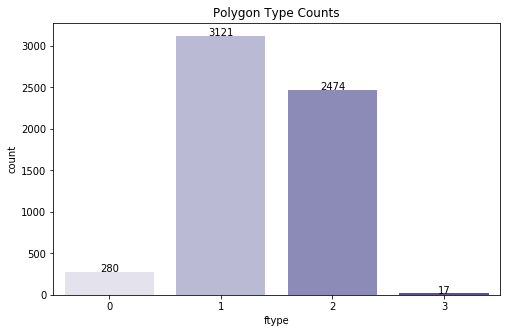

In [37]:
# eda.ftype.plot(kind='bar')
fig, ax=plt.subplots(figsize=(8,5))
graph = sns.countplot(data=eda, x='ftype', ax=ax, palette='Purples')
ax.set(title='Polygon Type Counts');
# eda['ftype'].value_counts()
i = 0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        eda['ftype'].value_counts()[i],ha="center")
    i += 1

In [38]:
eda['st_area'].quantile(.9)

3083.8092192305535

In [268]:
## version 4
#inputs
t = 0
stoptime = 50 #first truck time
still_alive = False
ros = 0.8
firept = (14.644973,121.050858)
fireradius_init = 10
mean_load = multipolygons_32651.fuel_load.mean()
print(mean_load)
# rateofburn = {0: 0, 1: 42.8/60, 
#               2: 52.1/60, 3: 55/60}
rateofburn = {0: 0, 1:0.333 , 2: 0.6667, 3: 0.8}
# hps = []
# def getHp(x):
#     m = 1.1
#     bb = 58
#     # b = -0.000781
#     b = -0.00088
#     lag = 265
#     A = 0.928
#     lin = m*x['st_area']+bb
# #     print(lin)
#     loged =  A *np.exp(-b * (x['st_area'] - lag))
# #     print(x['st_area'])
#     hps.append((x['st_area'], loged*lin))
#     x['hp'] = loged*lin
#     return x

def spreadFire(center, radius, ros, t, reverse=True, is_shape=False, epsg=32651):
    """
        gets fire line circle polygon in 32651 given the inputs
    """
    mult = ros*t
    if reverse:
        c = center if is_shape else Point(center[::-1])
        gdf = (gpd.GeoSeries(c, crs={'init':f'epsg:{epsg}'})
                   .to_crs(epsg=32651))
        
        return gdf.values[0], gdf.buffer(radius+mult), radius+mult
    else:
        c = center if is_shape else Point(center)
        gdf = (gpd.GeoSeries(c, crs={'init':f'epsg:{epsg}'})
                   .to_crs(epsg=32651))
        return gdf.values[0], gdf.buffer(radius+mult), radius+mult
    

#check if point is in multipolygon and which type
fire_cntr_init, fire_init, rad_init = spreadFire(firept, 1, 0, 0, epsg=4326)
flagdf = gpd.sjoin((gpd.GeoDataFrame(geometry=fire_init,
                                     crs={'init':'epsg:32651'})
                       .to_crs(epsg=32651))
           , multipolygons_32651)
firehp = (mean_load/rad_init)*ros
print(firehp)
gothit = flagdf.index_right.values.tolist()
if flagdf.shape[0] > 0:
    ros = rateofburn[flagdf.ftype.values[0]]
    firehp = (rad_init/flagdf.iloc[0]['st_area'])*flagdf.iloc[0]['fuel_load']*ros
    
print(firehp)
ross = [ros]
hps = [firehp]
firess = [fire_cntr_init]
results = {t:[fire_cntr_init, fire_init, fireradius_init]}
# results
while t<stoptime or still_alive:
    print(f'At {t}')
    
    results[t] = []
    for ic, fc in enumerate(firess):  
        firesscp = firess.copy()
        if ic == 0:
            fireCenter, fire, rad = spreadFire(fc, fireradius_init, ross[0], t,
                                         is_shape=True)
        else: 
#             print(ross[ic])
            fireCenter, fire, rad = spreadFire(fc, 1, ross[ic], t, is_shape=True)
        results[t].append((fireCenter, fire, rad))
        
        #check if it hits any multipolygons, if yes add to firess
        firegpd = gpd.GeoDataFrame(geometry=fire, crs={'init':'epsg:32651'})     
        index_list = gpd.sjoin(firegpd, multipolygons_).index_right.tolist()
#         print(index_list)
        whatsnew =[x for x in index_list if x not in gothit]
        #only if there are new polygons to hit

        if whatsnew:
#             print(whatsnew)
            polygonhit = gpd.overlay(firegpd, multipolygons_.iloc[whatsnew])
#             print(polygonhit)
#             print(firegpd['geometry'][0].intersection(polygonhit['geometry'][0]).area)
            hits = [nearest_points(firegpd.values[0][0], yy)[0] 
                         for yy in polygonhit['geometry']]
            hitTypes = polygonhit['ftype'].values.tolist()
            for ih, hc in enumerate(hits):
                if hc not in firess:
                    firesscp.append(hc)
                    ross.append(rateofburn[hitTypes[ih]])
                    print(polygonhit.iloc[ih]['st_area'])
                    firehp = ((rad/polygonhit.iloc[ih]['st_area'])*
                              polygonhit.iloc[ih]['fuel_load']*ross[ic])
                    hps.append(firehp)
            gothit = gothit + whatsnew
            
            firess = firesscp
        else:
            print('nothing new')
            continue
    t+=1
    
    

4480.208186203982
3584.166548963186
3584.166548963186
At 0
nothing new
At 1
nothing new
At 2
nothing new
At 3
nothing new
At 4
nothing new
At 5
2536.34568682456
At 6
602.358279512076
nothing new
At 7
nothing new
nothing new
nothing new
At 8
nothing new
nothing new
nothing new
At 9
nothing new
nothing new
nothing new
At 10
nothing new
nothing new
nothing new
At 11
nothing new
nothing new
nothing new
At 12
nothing new
nothing new
nothing new
At 13
nothing new
nothing new
nothing new
At 14
nothing new
nothing new
nothing new
At 15
nothing new
nothing new
nothing new
At 16
nothing new
nothing new
nothing new
At 17
nothing new
nothing new
nothing new
At 18
nothing new
nothing new
nothing new
At 19
nothing new
nothing new
nothing new
At 20
nothing new
nothing new
nothing new
At 21
nothing new
nothing new
nothing new
At 22
nothing new
nothing new
nothing new
At 23
nothing new
nothing new
nothing new
At 24
nothing new
nothing new
nothing new
At 25
nothing new
nothing new
nothing new
At 26
noth

In [269]:
# results
hps
# ross
# results
# firess

[3584.166548963186,
 86.13020458942016,
 17.687514112402635,
 0.0,
 51.620561481070176,
 57.877003673179104,
 42.75964582009826,
 103.3470988365068,
 6.381334420700371]

In [100]:
with open('data/fire_spread_res.pkl', 'wb') as f:
    pickle.dump(results, f)

In [42]:
def testOnMap(gpd, rad):
    curr_map = folium.Map(location = (14.62998, 121.02567), zoom_start=18)


    F = gpd.to_crs(epsg=4326).centroid
    # G = firegpd.to_crs(epsg=4326).centroid
    #     print(F)
    folium.Circle(location=(F.y, F.x), radius=rad, color='red').add_to(curr_map)
    # folium.Circle(location=(G.y, G.x), radius=firegpd.length.values[0]).add_to(curr_map)
    #     print(i)
    for G in multipolygons_32651.to_crs(epsg=4326).centroid:

        folium.Marker(location=(G.y, G.x)).add_to(curr_map)

    return curr_map   
def testOnMap2(centr, gpd):
    curr_map = folium.Map(location = centr, zoom_start=18)

    for i, (c, s, r) in enumerate(gpd):
        color = 'blue' if i ==0 else 'red'
        F = s.to_crs(epsg=4326).centroid
        # G = firegpd.to_crs(epsg=4326).centroid
        #     print(F)
        folium.Circle(location=(F.y, F.x), radius=r, color=color).add_to(curr_map)
    for G in multipolygons_32651.to_crs(epsg=4326).centroid:

        folium.Marker(location=(G.y, G.x)).add_to(curr_map)
    return curr_map

In [144]:
# (gpd.GeoSeries(results[49][0][0], crs={'init':f'epsg:{32651}'})
#                    .to_crs(epsg=4326)).values[0].x
centers, radii = [], []
for i in results[49]:
    center = i[0]
    to_4326 = (gpd.GeoSeries(results[49][0][0], crs={'init':f'epsg:{32651}'})
                   .to_crs(epsg=4326)).values[0]
    centers.append((to_4326.x, to_4326.y))
    radii.append(i[2])
print(centers, radii)

[(121.050858, 14.644973000000006), (121.050858, 14.644973000000006), (121.050858, 14.644973000000006), (121.050858, 14.644973000000006), (121.050858, 14.644973000000006), (121.050858, 14.644973000000006), (121.050858, 14.644973000000006), (121.050858, 14.644973000000006), (121.050858, 14.644973000000006)] [44.95333333333333, 17.317, 17.317, 1, 17.317, 17.317, 17.317, 17.317, 17.317]


In [267]:
testOnMap2(firept, results[49])
# np.unique(radii).sum()

In [145]:
# results
# gothit
# multipolygons_.iloc[gothit[1]].geom
# results
np.floor(2.9)

2.0

In [91]:
fire = Point((1627638.473,294845.192)[::-1])
firegpd = gpd.GeoDataFrame([{"geometry":fire}], crs={"init":"epsg:32651"})
firegpd.to_crs(epsg=4326, inplace=True)
testOnMap(firegpd,10)
# firegpd['geometry'].x

# curr_map = folium.Map(location = (firegpd['geometry'].y, firegpd['geometry'].x),zoom_start=10)

# folium.Marker(
#         location=dest,
#         popup='Destination',
#         icon=folium.Icon(color='red')
#         ).add_to(curr_map)

In [333]:
# ## Version 3

# #inputs
# t = 0
# stoptime = 20 #first truck time
# still_alive = False
# ros = 42.8/60
# firept = (14.629973,121.025258)
# fireradius_init = 30

# # rateofburn = {0: 0, 1: 42.8/60, 
# #               2: 52.1/60, 3: 55/60}
# rateofburn = {0: 0, 1:0.333 , 2: 0.6667, 3: 0.8}

# def spreadFire(center, radius, ros, t, reverse=True, is_shape=False, epsg=32651):
#     """
#         gets fire line circle polygon in 32651 given the inputs
#     """
#     mult = ros*t
#     if reverse:
#         c = center if is_shape else Point(center[::-1])
#         gdf = (gpd.GeoSeries(c, crs={'init':f'epsg:{epsg}'})
#                    .to_crs(epsg=32651))
#         return gdf.values[0], gdf.buffer(radius+mult), radius+mult
#     else:
#         c = center if is_shape else Point(center)
#         gdf = (gpd.GeoSeries(c, crs={'init':f'epsg:{epsg}'})
#                    .to_crs(epsg=32651))
#         return gdf.values[0], gdf.buffer(radius+mult), radius+mult
    


    
# #check if point is in multipolygon and which type
# fire_cntr_init, fire_init, rad_init = spreadFire(firept, 1, 0, 0, epsg=4326)
# flagdf = gpd.sjoin((gpd.GeoDataFrame(geometry=fire_init,
#                                      crs={'init':'epsg:32651'})
#                        .to_crs(epsg=32651))
#            , multipolygons_32651, op='within')
# if flagdf.shape[0] > 0:
#     ros = rateofburn[flagdf.ftype.values[0]]

# ross = [ros]
# firess = [fire_cntr_init]
# results = {t:[fire_cntr_init, rad_init, fire_init]}
# gothit = []
# if flagdf.shape[0] > 0:
#     gothit = [flagdf.iloc[0].index_right]

# # restults = {}

# while t<stoptime or still_alive:
#     t += 1
#     results[t] = []
    
#     #loop throuhg the fire starting points
#     for ic, fc in enumerate(firess):
#         firesscp = firess.copy()
# # a
#         if ic == 0:
#             fireCenter, fire, rad = spreadFire(fc, fireradius_init, ross[0], t,
#                                          is_shape=True)
#         else: 
#             fireCenter, fire, rad = spreadFire(fc, 0, ross[ic], t, is_shape=True)

#         results[t].append((fireCenter,rad, fire))
        
#         #check if it hits any multipolygons, if yes add to firess
#         firegpd = gpd.GeoDataFrame(geometry=fire, crs={'init':'epsg:32651'})
#         index_list = gpd.sjoin(firegpd, multipolygons_32651).index_right.tolist()

# #         temp = gothit + index_list
# #         gothit = /
# #         print(gothit)
#         if len(index_list) > 0:
#             print(index_list)
#             polygonhit = gpd.overlay(firegpd, multipolygons_32651.iloc[index_list])
#             hits = [nearest_points(firegpd.values[0][0], yy)[0] 
#                          for yy in polygonhit['geometry']]
#             hitTypes = polygonhit['ftype'].values.tolist()
#             for ih, hc in enumerate(hits):
#                 if hc not in firess:
#                     firesscp.append(hc)
#                     ross.append(rateofburn[hitTypes[ih]])
#         else: 
#             continue
            
#         firess = firesscp
# #     print(t, len(firess))        
        
            



[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]


KeyboardInterrupt: 

In [303]:
# results[0]
results
# fireCenter, fire, rad = results[0][0],results[0][2],results[0][1]

{0: [<shapely.geometry.point.Point at 0x7f7f2f17f490>,
  1,
  0    POLYGON ((287303.825 1618326.078, 287303.820 1...
  dtype: geometry],
 1: [(<shapely.geometry.point.Point at 0x7f7f2f17f490>,
   130.333,
   0    POLYGON ((287433.158 1618326.078, 287432.530 1...
   dtype: geometry)],
 2: [(<shapely.geometry.point.Point at 0x7f7f2f17f490>,
   130.666,
   0    POLYGON ((287433.491 1618326.078, 287432.862 1...
   dtype: geometry),
  (<shapely.geometry.point.Point at 0x7f7f33cebf90>,
   0.666,
   0    POLYGON ((287185.399 1618271.297, 287185.395 1...
   dtype: geometry),
  (<shapely.geometry.point.Point at 0x7f7f33d1e590>,
   0.666,
   0    POLYGON ((287283.887 1618197.386, 287283.884 1...
   dtype: geometry),
  (<shapely.geometry.point.Point at 0x7f7f2f245c90>,
   0.666,
   0    POLYGON ((287185.879 1618270.281, 287185.876 1...
   dtype: geometry),
  (<shapely.geometry.point.Point at 0x7f7f2f2457d0>,
   0.666,
   0    POLYGON ((287267.962 1618439.666, 287267.959 1...
   dtype: geometry),


In [219]:
firegpd = gpd.GeoDataFrame(geometry=fire, crs={'init':'epsg:32651'})
index_list = gpd.sjoin(firegpd, multipolygons_32651, how='inner').index_right.tolist()

In [289]:
# index_list.remove(1685)
flagdf
fire_init

0    POLYGON ((287303.825 1618326.078, 287303.820 1...
dtype: geometry

In [292]:
# firegpd.geometry.iloc[0]
# multipolygons_32651.iloc[index_list].geom.iloc[0]
gpd.sjoin((gpd.GeoDataFrame(geometry=fire_init,
                                     crs={'init':'epsg:4326'})
                       .to_crs(epsg=32651))
           , multipolygons_32651)

,geometry,index_right,osm_id,landuse,name,building,natural,other_tags,st_area,perimeter,ftype
0,"POLYGON ((287303.825 1618326.078, 287303.820 1...",1685,None,commercial,Bureau of Telecommunication,None,None,"""addr:city""=>""Quezon City"",""addr:street""=>""Sco...",10614.948813,412.76078,1


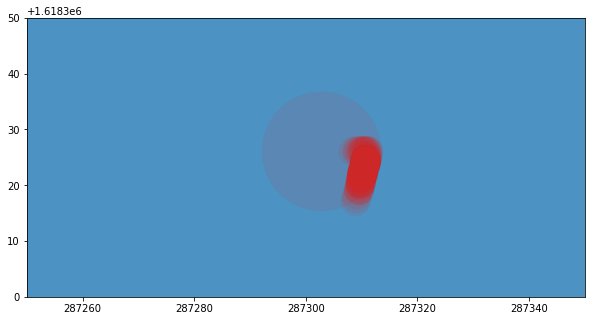

In [108]:
fig, ax = plt.subplots(figsize=(10,10))
mm_shp_32651.plot(ax=ax, alpha=0.8)

# fire_init.plot(ax=ax, color='green')

for i, (c, y) in enumerate(results[8]):
#     print(i)
    y.plot(ax=ax, color=f'C3', alpha=0.1)
# results[3][0][1].values[0]
ax.set(ylim=(1618300,1618350),xlim=(287250,287350));

In [267]:
# multipolygons_32651.to_crs(epsg=4326).centroid
results[20][0][2].to_crs(epsg=4326)

0    POLYGON ((121.02567 14.62998, 121.02567 14.629...
dtype: geometry

In [304]:
curr_map = folium.Map(location = (14.62998, 121.02567), zoom_start=18)

# for i, (c, r, s) in enumerate(results[0]):
F = results[20][0][2].to_crs(epsg=4326).centroid
# G = firegpd.to_crs(epsg=4326).centroid
#     print(F)
folium.Circle(location=(F.y, F.x), radius=results[20][0][1], color='red').add_to(curr_map)
# folium.Circle(location=(G.y, G.x), radius=firegpd.length.values[0]).add_to(curr_map)
#     print(i)
for F in multipolygons_32651.to_crs(epsg=4326).centroid:
    
    folium.Marker(location=(F.y, F.x)).add_to(curr_map)
    
curr_map   

KeyError: 20

In [ ]:
test = [1]
tt = 0
stop = 4
while tt < stop:
    print(tt)
    for xt in test:
        test2 = test.copy()
        test2.append(xt+1)
    tt+=1
    test=test2
    print(test)

In [ ]:
# ##version 2


# #inputs
# t = 1
# stoptime = 10
# ros = 42.1

# firept = (14.629973,121.025258)
# fireradius_init = 40
# rateofburn = {0: 0, 1: 42.8, 
#               2: 52.1/60, 3: 55/60}


# def spreadFire(center, radius, ros, t, reverse=True, is_shape=False, epsg=32651):
#     """
#         gets fire line circle polygon in 32651 given the inputs
#     """
#     mult = ros*t
#     if reverse:
#         c = center if is_shape else Point(center[::-1])
#         gdf = (gpd.GeoSeries(c, crs={'init':f'epsg:{epsg}'})
#                    .to_crs(epsg=32651))
#         return gdf.values[0], gdf.buffer(fireradius_init+mult)
#     else:
#         c = center if is_shape else Point(center)
#         gdf = (gpd.GeoSeries(c, crs={'init':f'epsg:{epsg}'})
#                    .to_crs(epsg=32651))
#         return gdf.values[0], gdf.buffer(fireradius_init+mult)

# #check if point is in multipolygon and which type
# fire_cntr_init, fire_init = spreadFire(firept, fireradius_init, 0, 0, epsg=4326)
# flagdf = gpd.sjoin((gpd.GeoDataFrame(geometry=[fire_cntr_init],crs={'init':'epsg:4326'})
#                        .to_crs(epsg=32651))
#            ,multipolygons_32651, op='within')
# if flagdf.shape[0] > 0:
#     ros = rateofburn[flagdf.ftype.values[0]]

# #arrays to store corresponding fires starts and rates of spread
# ross = [ros]
# firess = [fire_cntr_init]
# results = {}
# gothits = [] #multipolygons_32651 index list 

# #start fires
# while t <= stoptime:
#     print(f'while loop {t}')
#     for ic, cntr in enumerate(firess):
#         firesscp = firess.copy()
#         print('loop in for ', ic, cntr)
    
# #         print(cntr)
#         #get fire
#         fire_cntr, fire = spreadFire(cntr, 50, ross[ic], t, is_shape=True)
        
#         #check if it hits any multipolygons and add to gothits list
#         firegpd = gpd.GeoDataFrame(geometry=fire, crs={'init':'epsg:32651'})
#         index_list = gpd.sjoin(firegpd, multipolygons_32651).index_right.tolist()
#         #remove already hit polygons from the list
#         for x in gothits:
#             index_list.remove(x)
#         gothits += index_list
# #         print(index_list)
# #         print(gothits)
#         if index_list:
#             polygonhit = gpd.overlay(firegpd, multipolygons_32651.iloc[index_list])
#         else:
#             continue
            
        
# # #         print(polygonhit)
#         firesscp += [nearest_points(firegpd.values[0][0], yy)[0] 
#                      for yy in polygonhit['geometry']]
#         print(firesscp)
#         firess = firesscp
# #         print(len(firess), len(firesscp))
        
#     t += 1
        
    

In [ ]:
multipolygons_32651[multipolygons_32651['geom'] != polygonshit[0]]
gpd.sjoin(firegpd, multipolygons_32651).index_right

In [ ]:
gpd.GeoSeries(Point(firept[::-1]), crs={'init':'epsg:4326'}).to_crs(epsg=32651).values[0]

In [651]:
[pt.wkt  for xy in gpd.overlay(x, multipolygons_32651)['geometry'] for pt in nearest_points(x.wkt, xy.wkt)]

/home/eamgo/miniconda3/envs/gsaproject/lib/python3.7/site-packages/geopandas/base.py:48: UserWarning: GeoSeries crs mismatch: +init=epsg:4326 +type=crs and epsg:32651
  warn("GeoSeries crs mismatch: {0} and {1}".format(this.crs, other.crs))


AttributeError: 'GeoDataFrame' object has no attribute 'wkt'

/home/eamgo/miniconda3/envs/gsaproject/lib/python3.7/site-packages/geopandas/base.py:48: UserWarning: GeoSeries crs mismatch: +init=epsg:4326 +type=crs and None
  warn("GeoSeries crs mismatch: {0} and {1}".format(this.crs, other.crs))


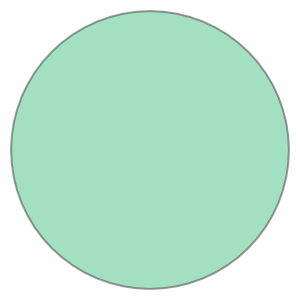

In [393]:
# np.nonzero(firegpd.buffer(.57).intersects(multipolygons_).values)[0].tolist()
firegpd.buffer()[0]#.intersection(multipolygons_.iloc[0]['wkb_geometry']).centroid

In [384]:
test = [1,2,3]
for i in test:
    test2=test.copy()
    x = test2[-1]
    print(test2)
    test2.append(x+1)
    test =test2

[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, 4, 5]


In [254]:
test = [1,2,3]
test[2]=5
test

[1, 2, 5]